IP Addresses Or Ranges Blocked Currently

In [1]:
# Importing modules
import requests
import pandas as pd
from IPython.display import display
import time


In [2]:
# Wikis to process
wikis = ['te', 'hi', 'ml']
all_dfs = []

# Function to fetch blocked IPs/users using MediaWiki API
def get_blocked_ips(wiki_code):
    url = f"https://{wiki_code}.wikipedia.org/w/api.php"
    params = {
        'action': 'query',
        'list': 'blocks',
        'format': 'json',
        'bklimit': 'max'
    }

    response = requests.get(url, params=params)
    # returning empty data frame when the data fetching fails
    if response.status_code != 200:
        print(f"Error fetching data from {wiki_code}wiki")
        return pd.DataFrame()
    
    blocks = response.json().get('query', {}).get('blocks', [])
    
    # if there are no active blocks then an empty dataframe is returned
    if not blocks:
        print(f"No active blocks in {wiki_code}wiki.")
        return pd.DataFrame()

    df = pd.DataFrame(blocks)
    df['wiki'] = wiki_code + 'wiki'
    
    return df


In [3]:
# Fetch and display data per wiki
for wiki in wikis:
    print(f"\nFetching blocks from {wiki}wiki...")
    df = get_blocked_ips(wiki)
    
    if not df.empty:
        # Only keep IP blocks (filter out usernames)
        df_ip_only = df[df['user'].str.contains(r'^\d{1,3}\.') | df['user'].str.contains(":")]
        print(f"Blocked IPs in {wiki}wiki:")
        display(df_ip_only[['user','expiry', 'reason']].head(10))
        all_dfs.append(df_ip_only)

    time.sleep(1)  



Fetching blocks from tewiki...
Blocked IPs in tewiki:


,user,expiry,reason
0,14.194.144.254,2025-08-03T17:09:15Z,పేజీల్లోకి చెత్తను ఎక్కించడం: పేజీలలో ఉన్న సమా...
1,2405:201:C418:C07B:D4FD:811F:7472:28E4,2025-12-27T03:38:12Z,పేజీల్లోకి చెత్తను ఎక్కించడం
2,2405:201:C418:C07B:313A:15B4:EC92:4F25,2025-12-22T06:53:00Z,తప్పు సమాచారాన్ని చొప్పించడం
3,2405:201:C418:C07B:CA4:179D:C289:A5C8,2025-12-17T17:07:53Z,తప్పు సమాచారాన్ని చొప్పించడం
4,2409:408C:3E90:89F1:0:0:4F4A:7515,2025-12-16T14:14:45Z,పేజీల్లోని సమాచారాన్ని తీసెయ్యడం
5,2405:201:C418:C07B:FEA5:70AC:97:930C,2025-11-28T09:07:06Z,తప్పు సమాచారాన్ని చొప్పించడం
6,2405:201:C418:C07B:BF88:2B03:E598:BBA3,2025-11-27T07:57:03Z,తప్పు సమాచారాన్ని చొప్పించడం
7,2405:201:C418:C07B:479E:A790:83D9:296E,2026-05-27T02:01:10Z,తప్పు సమాచారాన్ని చొప్పించడం: పదే పదే తప్పు సమ...
8,2405:201:C418:C07B:D9BB:E108:5035:281C,2025-11-21T15:25:16Z,తప్పు సమాచారాన్ని చొప్పించడం: పదే పదే ఎన్నికల ...
9,2401:4900:3686:128F:1:1:3D8B:88BF,2025-08-08T11:28:17Z,అనుచితమైన వాడుకరి పేరు: అనుచితమైన వాడుకరి పేరు...



Fetching blocks from hiwiki...
Blocked IPs in hiwiki:


,user,expiry,reason
19,2402:3A80:1C4E:683C:0:0:0:0/64,2025-10-07T16:03:06Z,अय्यारी (एक से अधिक खाते खोलकर परेशान करना): अ...
20,2405:201:4030:701A:0:0:0:0/64,2025-10-06T19:41:53Z,अय्यारी (एक से अधिक खाते खोलकर परेशान करना): अ...
38,2409:40D4:1104:D025:8CD5:BE08:449E:2382,2025-11-03T02:38:07Z,Vandalism ([[m:GS|global sysop]] action)
165,103.159.46.2,infinity,Cross-wiki vandalism ([[m:GS|global sysop]] ac...
181,36.255.183.66,infinity,केवल प्रचार/स्पैम खाता
182,37.111.145.74,infinity,अर्थहीन संपादन करना
183,2409:4052:E96:B8DC:0:0:BACB:850A,infinity,केवल बर्बरता खाता
404,223.177.181.60,infinity,केवल बर्बरता खाता



Fetching blocks from mlwiki...
Blocked IPs in mlwiki:


,user,expiry,reason
0,103.175.89.41,infinity,അനാവശ്യം/അസംബന്ധം താളിലേക്കു ചേർക്കൽ
2,106.205.161.123,infinity,നശീകരണ പ്രവർത്തനം
3,78.149.250.223,infinity,അനാവശ്യം/അസംബന്ധം താളിലേക്കു ചേർക്കൽ: വ്യാപകമാ...
4,120.61.208.141,infinity,അനാവശ്യം/അസംബന്ധം താളിലേക്കു ചേർക്കൽ
5,117.250.237.126,infinity,തുടർച്ചയായി നിഷ്പക്ഷതാരഹിതമായതും താല്പര്യവ്യത്...
6,14.139.185.126,infinity,ദുരുദ്ദേശത്തോടെ ഉപയോഗിക്കുന്ന നിരവധി അംഗത്വങ്ങ...
7,14.139.185.115,infinity,ദുരുദ്ദേശത്തോടെ ഉപയോഗിക്കുന്ന നിരവധി അംഗത്വങ്ങ...
8,2402:8100:3920:C8C5:379D:5992:3717:EC5D,2026-02-16T15:03:13Z,നശീകരണ പ്രവർത്തനം: പി. കുഞ്ഞിരാമൻ നായർ താളിൽ ന...
9,103.146.175.99,2025-12-28T08:16:32Z,
10,2409:4073:4D96:89DC:8A17:EB11:ECD1:1B96,infinity,തുടർച്ചയായി നിഷ്പക്ഷതാരഹിതമായതും താല്പര്യവ്യത്...


In [11]:
# Combine all results into a single DataFrame
combined_df = pd.concat(all_dfs, ignore_index=True)
# classifying the type of duration (definite or indefinite)
combined_df['duration_type'] = combined_df['expiry'].apply(
        lambda x: 'indefinite' if x == 'infinity' else 'definite'
    )
# Show summary
print(f"\nTotal blocked IPs collected: {len(combined_df)}")
display(combined_df[['user','duration_type','expiry', 'reason', 'wiki']].head(5))
display(combined_df[['user','duration_type','expiry', 'reason', 'wiki']].tail())


Total blocked IPs collected: 448


,user,duration_type,expiry,reason,wiki
0,14.194.144.254,definite,2025-08-03T17:09:15Z,పేజీల్లోకి చెత్తను ఎక్కించడం: పేజీలలో ఉన్న సమా...,tewiki
1,2405:201:C418:C07B:D4FD:811F:7472:28E4,definite,2025-12-27T03:38:12Z,పేజీల్లోకి చెత్తను ఎక్కించడం,tewiki
2,2405:201:C418:C07B:313A:15B4:EC92:4F25,definite,2025-12-22T06:53:00Z,తప్పు సమాచారాన్ని చొప్పించడం,tewiki
3,2405:201:C418:C07B:CA4:179D:C289:A5C8,definite,2025-12-17T17:07:53Z,తప్పు సమాచారాన్ని చొప్పించడం,tewiki
4,2409:408C:3E90:89F1:0:0:4F4A:7515,definite,2025-12-16T14:14:45Z,పేజీల్లోని సమాచారాన్ని తీసెయ్యడం,tewiki


,user,duration_type,expiry,reason,wiki
443,66.236.18.180,indefinite,infinity,[[meta:No open proxies]],mlwiki
444,66.232.118.159,indefinite,infinity,[[meta:No open proxies]],mlwiki
445,66.232.113.212,indefinite,infinity,[[meta:No open proxies]],mlwiki
446,66.230.200.194,indefinite,infinity,[[meta:No open proxies]],mlwiki
447,66.212.28.34,indefinite,infinity,[[meta:No open proxies]],mlwiki


Pie Chart for the distribution of blocked IP's By wiki

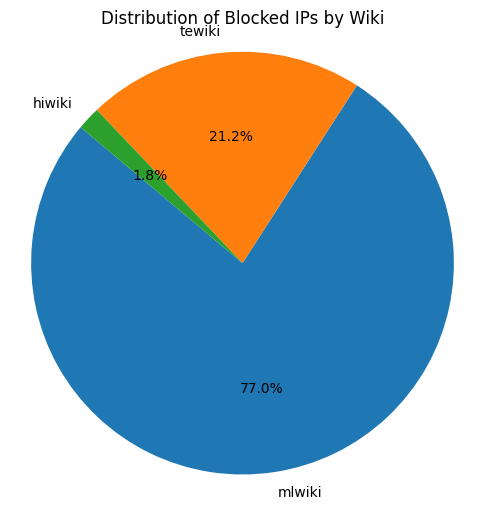

In [5]:
import matplotlib.pyplot as plt

# Count of blocked IPs by wiki
wiki_counts = combined_df['wiki'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(wiki_counts, labels=wiki_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Blocked IPs by Wiki")
plt.axis('equal')
plt.show()


Bar Chart - Indefinite vs Definite Values distribution

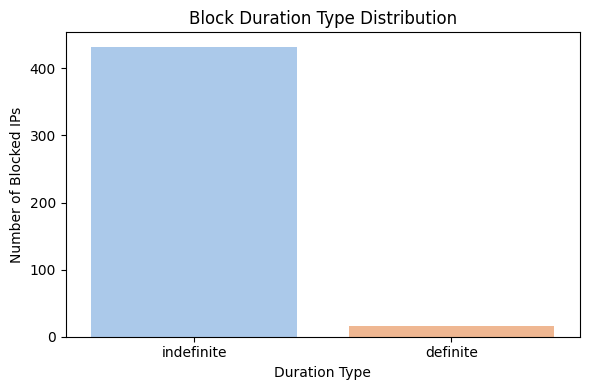

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# counting the values in the combined_df which has all blocked ip of [mlwiki,tewiki,enwiki]
duration_df = combined_df['duration_type'].value_counts().reset_index()
duration_df.columns = ['duration_type', 'count']
# plotting the bar chart for indefinite vs definite 
plt.figure(figsize=(6, 4))
sns.barplot(data=duration_df, x='duration_type', y='count', hue='duration_type', palette='pastel', legend=False)
plt.title("Block Duration Type Distribution")
plt.ylabel("Number of Blocked IPs")
plt.xlabel("Duration Type")
plt.tight_layout()
plt.show()


Bar Chart for Top 4 blocking reasons in the blocked ip's

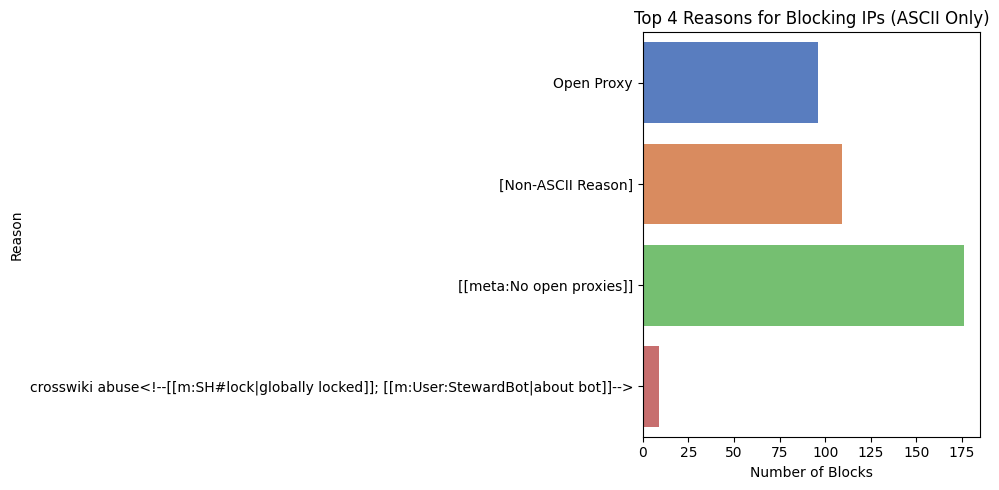

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Getting the top 4 blocking reasons from combined_df
top_reasons = combined_df['reason'].value_counts().head(10)
top_reasons_df = top_reasons.reset_index()
top_reasons_df.columns = ['reason', 'count']

# Replace non-ASCII reasons with a label
def sanitize_reason(reason):
    return reason if reason.isascii() else '[Non-ASCII Reason]'

top_reasons_df['reason'] = top_reasons_df['reason'].apply(sanitize_reason)

# Combine duplicate '[Non-ASCII Reason]' entries (since multiple could be replaced)
top_reasons_df = top_reasons_df.groupby('reason', as_index=False).sum()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_reasons_df,
    y='reason',
    x='count',
    hue='reason',
    palette='muted',
    dodge=False,
    legend=False
)
plt.title("Top 4 Reasons for Blocking IPs (ASCII Only)")
plt.xlabel("Number of Blocks")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()


Blocked IPs by Duration Type per Wiki

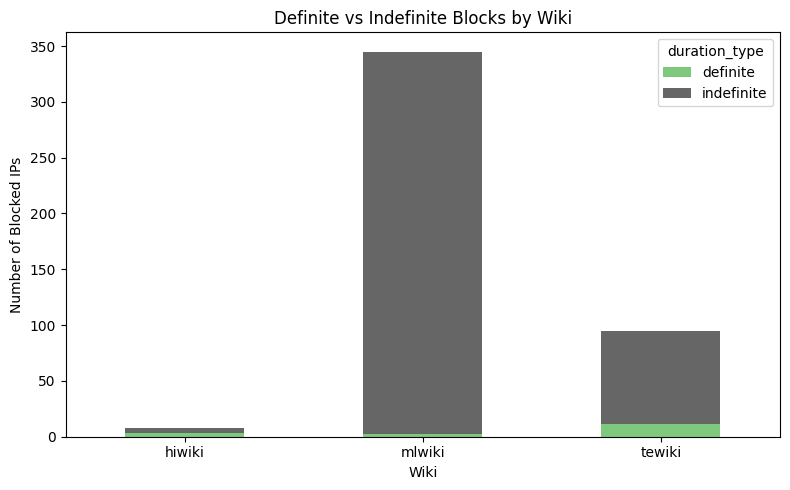

In [8]:
duration_by_wiki = combined_df.groupby(['wiki', 'duration_type']).size().unstack(fill_value=0)

duration_by_wiki.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
plt.title("Definite vs Indefinite Blocks by Wiki")
plt.xlabel("Wiki")
plt.ylabel("Number of Blocked IPs")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
